In [ ]:
!pip install --quiet yfinance statsmodels pandas matplotlib

# 1) Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf

In [ ]:
plt.rcParams['figure.figsize'] = (12,5)

In [ ]:
data = pd.read_csv("prices_with_metrics.csv")

In [ ]:
data.head(6)

,Date,crypto,Open,High,Low,Close,Volume,returns,log_returns,volatility_7d,volatility_30d,returns_squared,price_normalized
0,2020-10-12,BNB,28.549908,31.082113,28.491446,30.714682,718406691,NaN,NaN,NaN,NaN,NaN,0.003006
1,2020-10-13,BNB,30.670006,31.765100,30.269403,30.706745,600050050,-0.000258,-0.000258,NaN,NaN,6.676726e-08,0.003000
2,2020-10-14,BNB,30.738811,31.297539,30.461908,30.912119,460297911,0.006688,0.006666,0.004912,0.004912,4.473242e-05,0.003160
3,2020-10-15,BNB,30.889919,31.569292,30.500120,31.295864,504135680,0.012414,0.012338,0.006346,0.006346,1.541091e-04,0.003459
4,2020-10-16,BNB,31.314039,31.917166,29.666964,29.994900,546849696,-0.041570,-0.042459,0.024480,0.024480,1.728052e-03,0.002445
5,2020-10-17,BNB,30.043756,30.555607,29.719992,30.248236,377026508,0.008446,0.008411,0.022122,0.022122,7.133437e-05,0.002642


##1.1 random walk test

🔍 RANDOM WALK TEST - Augmented Dickey-Fuller (ADF)

📊 ADF Test for PRICES (Close):
   ADF Statistic: -2.805176
   p-value: 0.057538
   Critical Values:
      1%: -3.431
      5%: -2.862
      10%: -2.567
   ✅ CONCLUSION: Fail to reject null → Prices follow a RANDOM WALK (non-stationary)

📊 ADF Test for RETURNS:
   ADF Statistic: -13.376397
   p-value: 0.000000
   Critical Values:
      1%: -3.431
      5%: -2.862
      10%: -2.567
   ✅ CONCLUSION: Reject null → Returns are STATIONARY (as expected)


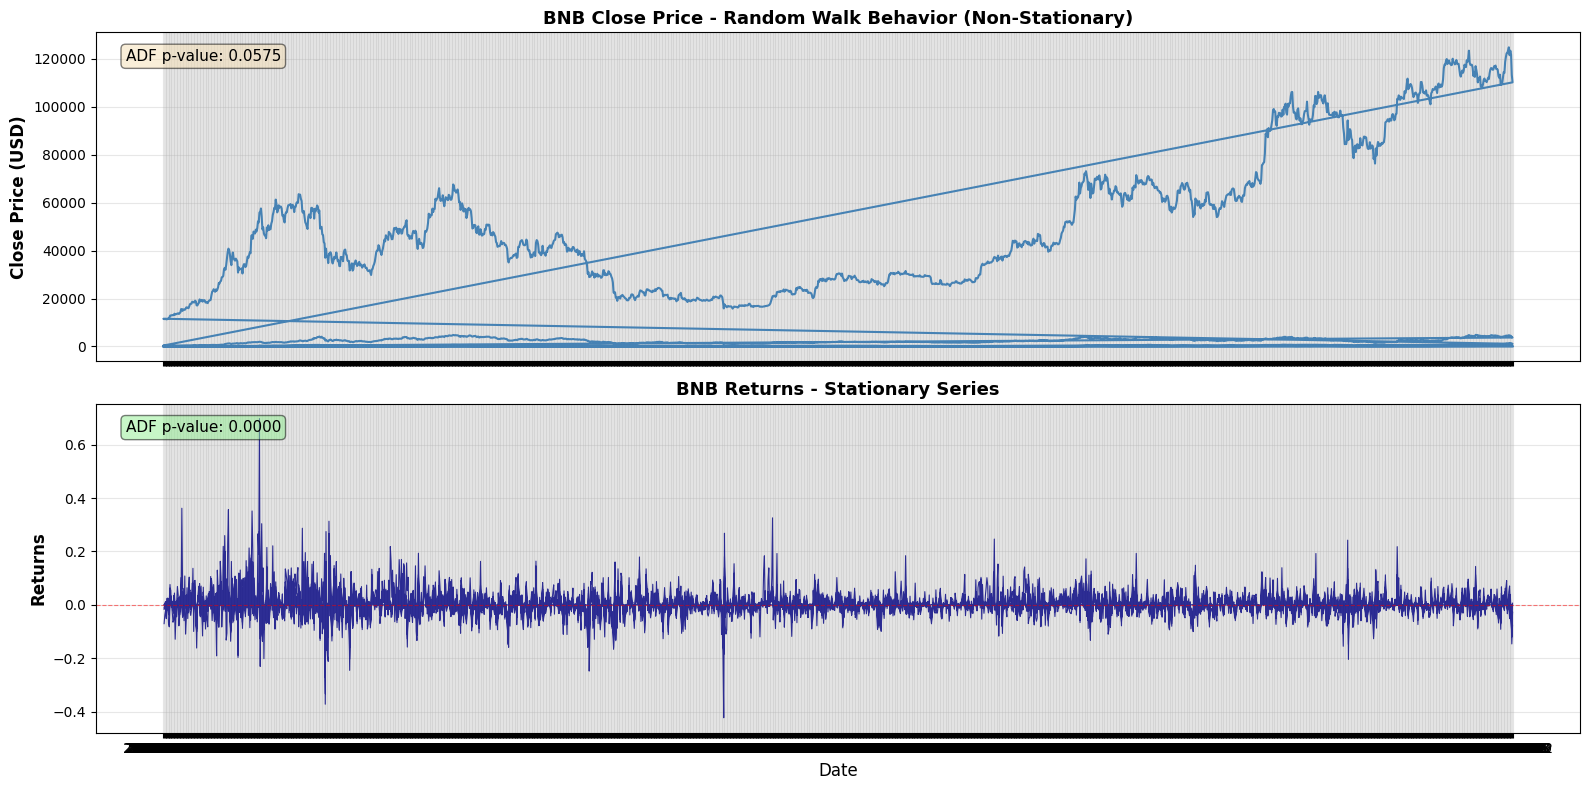


💡 INTERPRETATION:
   • High p-value (>0.05) for prices → Random Walk (non-stationary)
   • Low p-value (<0.05) for returns → Stationary process


In [ ]:
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt

# ===== RANDOM WALK TEST =====
print("=" * 70)
print("🔍 RANDOM WALK TEST - Augmented Dickey-Fuller (ADF)")
print("=" * 70)

# Test ADF para precios (Close)
adf_prices = adfuller(data['Close'].dropna(), autolag='AIC')

print("\n📊 ADF Test for PRICES (Close):")
print(f"   ADF Statistic: {adf_prices[0]:.6f}")
print(f"   p-value: {adf_prices[1]:.6f}")
print(f"   Critical Values:")
for key, value in adf_prices[4].items():
    print(f"      {key}: {value:.3f}")

if adf_prices[1] > 0.05:
    print("   ✅ CONCLUSION: Fail to reject null → Prices follow a RANDOM WALK (non-stationary)")
else:
    print("   ❌ CONCLUSION: Reject null → Prices are stationary (NOT a random walk)")

# Test ADF para retornos
adf_returns = adfuller(data['returns'].dropna(), autolag='AIC')

print("\n📊 ADF Test for RETURNS:")
print(f"   ADF Statistic: {adf_returns[0]:.6f}")
print(f"   p-value: {adf_returns[1]:.6f}")
print(f"   Critical Values:")
for key, value in adf_returns[4].items():
    print(f"      {key}: {value:.3f}")

if adf_returns[1] < 0.05:
    print("   ✅ CONCLUSION: Reject null → Returns are STATIONARY (as expected)")
else:
    print("   ⚠️  CONCLUSION: Fail to reject null → Returns may be non-stationary")

# Visualización: Precios vs Returns
fig, axes = plt.subplots(2, 1, figsize=(16, 8), sharex=True)

# Panel 1: Precios (Random Walk)
axes[0].plot(data['Date'], data['Close'], color='steelblue', linewidth=1.5)
axes[0].set_ylabel('Close Price (USD)', fontsize=12, fontweight='bold')
axes[0].set_title('BNB Close Price - Random Walk Behavior (Non-Stationary)',
                  fontsize=13, fontweight='bold')
axes[0].grid(alpha=0.3)
axes[0].text(0.02, 0.95, f'ADF p-value: {adf_prices[1]:.4f}',
             transform=axes[0].transAxes, fontsize=11,
             verticalalignment='top', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

# Panel 2: Returns (Stationary)
axes[1].plot(data['Date'], data['returns'], color='navy', linewidth=0.8, alpha=0.8)
axes[1].axhline(0, color='red', linestyle='--', linewidth=0.8, alpha=0.5)
axes[1].set_xlabel('Date', fontsize=12)
axes[1].set_ylabel('Returns', fontsize=12, fontweight='bold')
axes[1].set_title('BNB Returns - Stationary Series', fontsize=13, fontweight='bold')
axes[1].grid(alpha=0.3)
axes[1].text(0.02, 0.95, f'ADF p-value: {adf_returns[1]:.4f}',
             transform=axes[1].transAxes, fontsize=11,
             verticalalignment='top', bbox=dict(boxstyle='round', facecolor='lightgreen', alpha=0.5))

plt.tight_layout()
plt.show()

print("\n" + "=" * 70)
print("💡 INTERPRETATION:")
print("   • High p-value (>0.05) for prices → Random Walk (non-stationary)")
print("   • Low p-value (<0.05) for returns → Stationary process")
print("=" * 70)

##1.2 ACF analysis


📊 AUTOCORRELATION FUNCTION (ACF) ANALYSIS


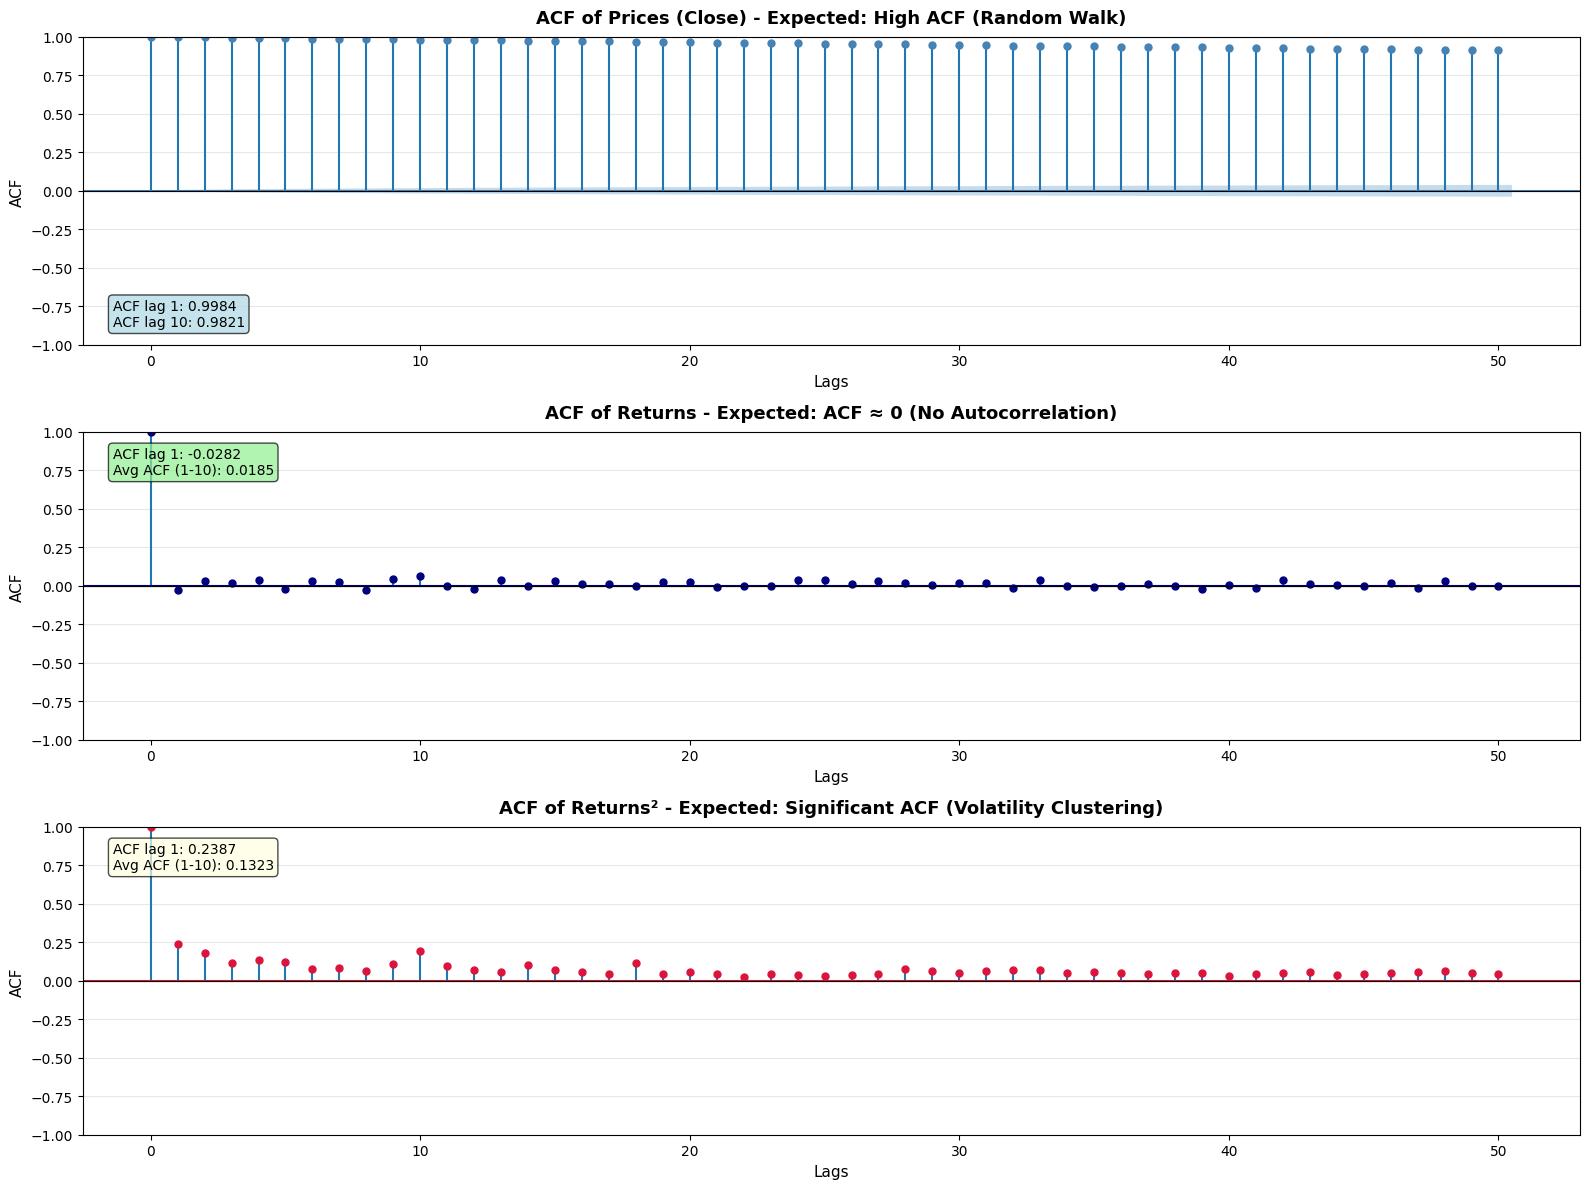


📈 ACF SUMMARY:
   Prices (lag 1):      0.9984 → Very high (Random Walk)
   Returns (avg 1-10):  0.0185 → Near zero (No autocorrelation)
   Returns² (avg 1-10): 0.1323 → Significant (Volatility clustering detected)


In [ ]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
import numpy as np

# ===== ACF ANALYSIS =====
print("=" * 70)
print("📊 AUTOCORRELATION FUNCTION (ACF) ANALYSIS")
print("=" * 70)

# Recalcular returns² sin suavizar
returns_squared_raw = data['returns'].dropna() ** 2

# Crear figura con 3 subplots
fig, axes = plt.subplots(3, 1, figsize=(16, 12))

# ===== ACF 1: PRECIOS =====
plot_acf(data['Close'].dropna(), lags=50, ax=axes[0], title='', color='steelblue', alpha=0.7)
axes[0].set_title('ACF of Prices (Close) - Expected: High ACF (Random Walk)',
                  fontsize=13, fontweight='bold', pad=10)
axes[0].set_xlabel('Lags', fontsize=11)
axes[0].set_ylabel('ACF', fontsize=11)
axes[0].grid(alpha=0.3, axis='y')
axes[0].axhline(y=0, color='black', linestyle='-', linewidth=0.8)

# Estadísticas de ACF para precios
acf_prices_values = [data['Close'].dropna().autocorr(lag=i) for i in range(1, 11)]
axes[0].text(0.02, 0.05, f'ACF lag 1: {acf_prices_values[0]:.4f}\nACF lag 10: {acf_prices_values[9]:.4f}',
             transform=axes[0].transAxes, fontsize=10,
             verticalalignment='bottom', bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.7))

# ===== ACF 2: RETORNOS =====
plot_acf(data['returns'].dropna(), lags=50, ax=axes[1], title='', color='navy', alpha=0.7)
axes[1].set_title('ACF of Returns - Expected: ACF ≈ 0 (No Autocorrelation)',
                  fontsize=13, fontweight='bold', pad=10)
axes[1].set_xlabel('Lags', fontsize=11)
axes[1].set_ylabel('ACF', fontsize=11)
axes[1].grid(alpha=0.3, axis='y')
axes[1].axhline(y=0, color='black', linestyle='-', linewidth=0.8)

# Estadísticas de ACF para retornos
acf_returns_values = [data['returns'].dropna().autocorr(lag=i) for i in range(1, 11)]
axes[1].text(0.02, 0.95, f'ACF lag 1: {acf_returns_values[0]:.4f}\nAvg ACF (1-10): {np.mean(acf_returns_values):.4f}',
             transform=axes[1].transAxes, fontsize=10,
             verticalalignment='top', bbox=dict(boxstyle='round', facecolor='lightgreen', alpha=0.7))

# ===== ACF 3: RETORNOS² (RAW) =====
plot_acf(returns_squared_raw, lags=50, ax=axes[2], title='', color='crimson', alpha=0.7)
axes[2].set_title('ACF of Returns² - Expected: Significant ACF (Volatility Clustering)',
                  fontsize=13, fontweight='bold', pad=10)
axes[2].set_xlabel('Lags', fontsize=11)
axes[2].set_ylabel('ACF', fontsize=11)
axes[2].grid(alpha=0.3, axis='y')
axes[2].axhline(y=0, color='black', linestyle='-', linewidth=0.8)

# Estadísticas de ACF para returns²
acf_returns_sq_values = [returns_squared_raw.autocorr(lag=i) for i in range(1, 11)]
axes[2].text(0.02, 0.95, f'ACF lag 1: {acf_returns_sq_values[0]:.4f}\nAvg ACF (1-10): {np.mean(acf_returns_sq_values):.4f}',
             transform=axes[2].transAxes, fontsize=10,
             verticalalignment='top', bbox=dict(boxstyle='round', facecolor='lightyellow', alpha=0.7))

plt.tight_layout()
plt.show()

# Resumen de resultados
print("\n📈 ACF SUMMARY:")
print(f"   Prices (lag 1):      {acf_prices_values[0]:.4f} → Very high (Random Walk)")
print(f"   Returns (avg 1-10):  {np.mean(acf_returns_values):.4f} → Near zero (No autocorrelation)")
print(f"   Returns² (avg 1-10): {np.mean(acf_returns_sq_values):.4f} → ", end="")

if np.mean(acf_returns_sq_values) > 0.05:
    print("Significant (Volatility clustering detected)")
else:
    print("Low (Weak clustering)")

print("=" * 70)

##1.3 Volatility and clustering


📊 VOLATILITY AND CLUSTERING ANALYSIS


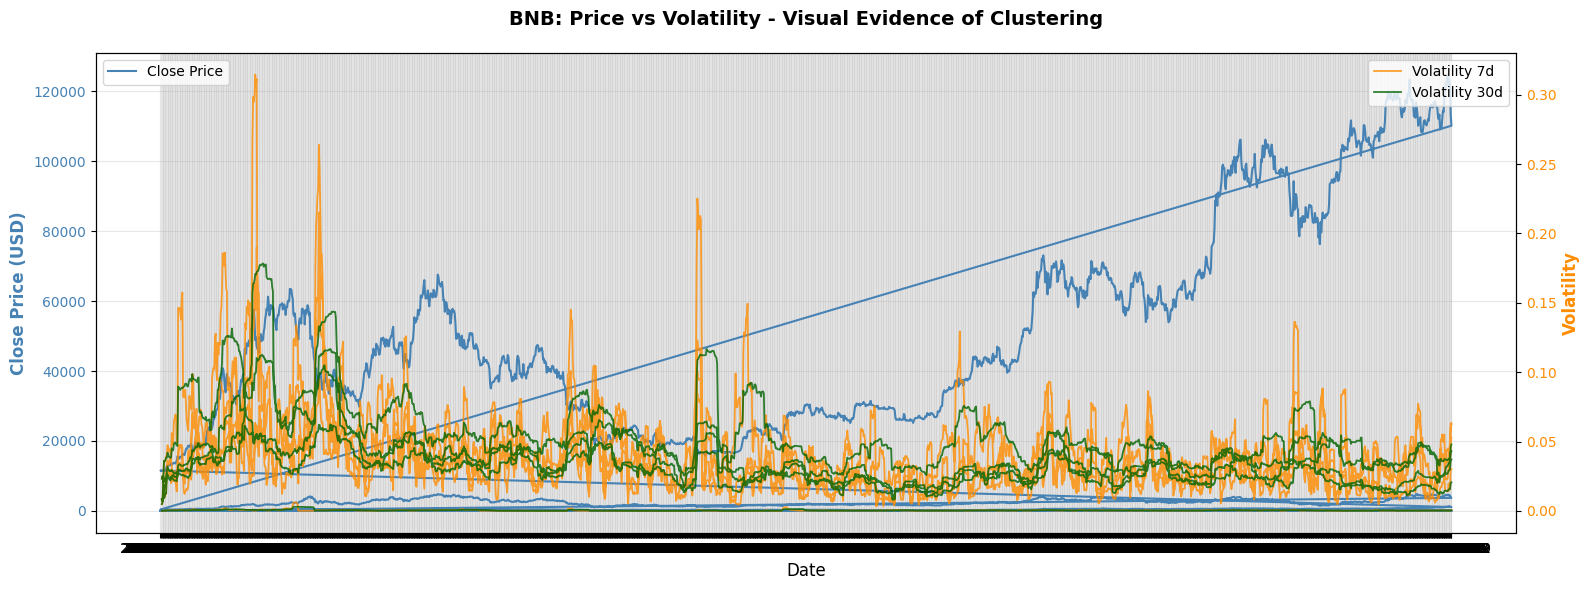

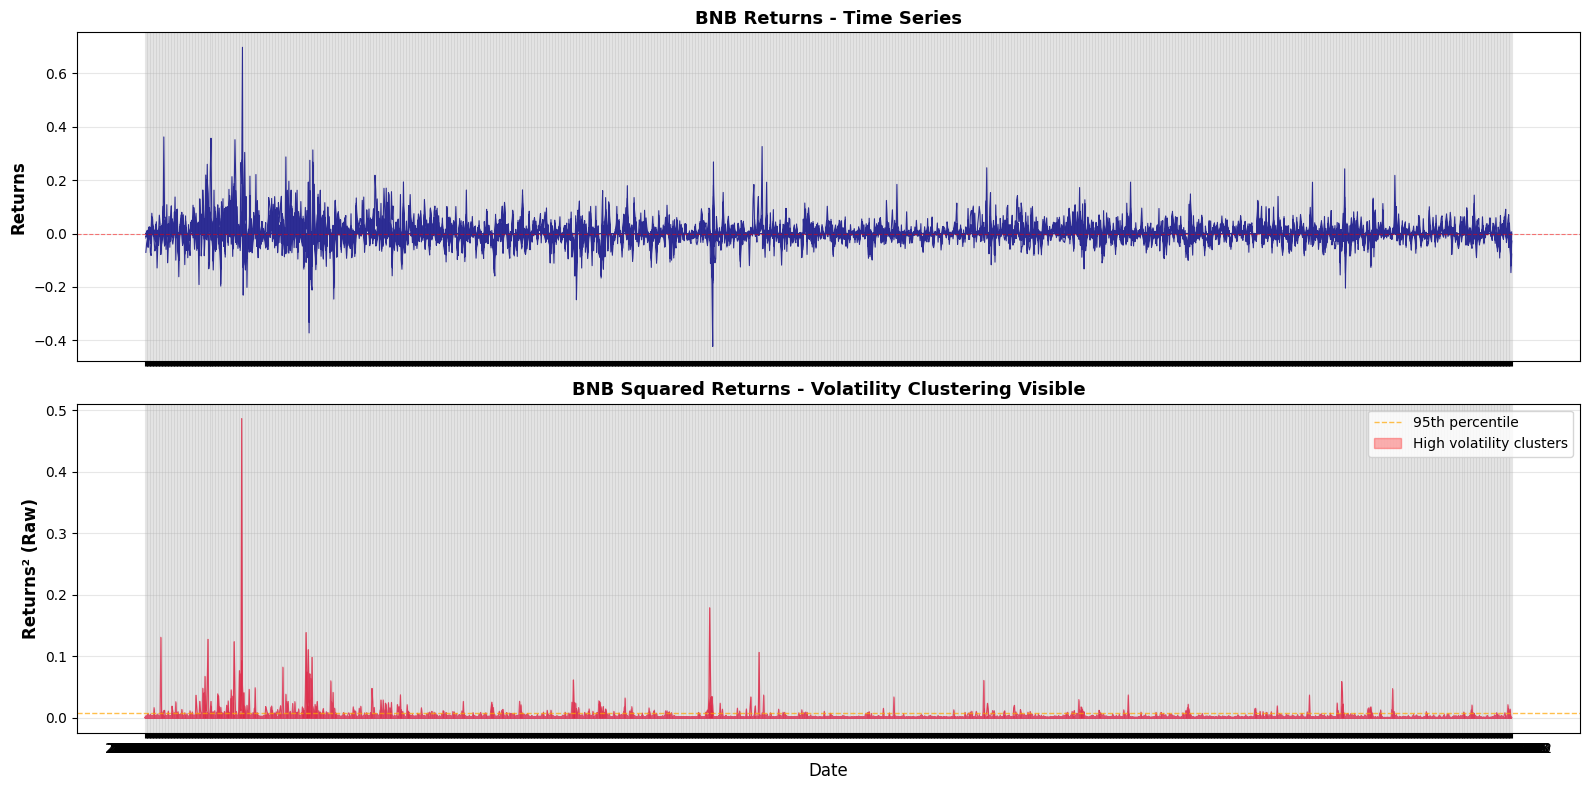


🔬 LJUNG-BOX TEST FOR VOLATILITY CLUSTERING:
----------------------------------------------------------------------

First 10 lags:
        lb_stat      lb_pvalue
1    520.299283  3.642746e-115
2    823.040576  1.901121e-179
3    951.444580  6.137932e-206
4   1116.244869  2.280412e-240
5   1250.475121  3.421767e-268
6   1305.797235  6.021782e-279
7   1373.007322  2.672152e-292
8   1409.815296  4.271626e-299
9   1515.646179   0.000000e+00
10  1856.636720   0.000000e+00

📊 Significant lags (p < 0.05): 20/20

💡 VOLATILITY CLUSTERING CONCLUSION:
   ✅ STRONG evidence of volatility clustering
   → Returns² show significant autocorrelation
   → High/low volatility periods cluster together

📈 VOLATILITY STATISTICS:
   Mean volatility (7d):  0.030138
   Max volatility (7d):   0.314467
   Std volatility (7d):   0.027587
   Mean volatility (30d): 0.032039
   Max volatility (30d):  0.178372


In [ ]:
import matplotlib.pyplot as plt
from statsmodels.stats.diagnostic import acorr_ljungbox
import numpy as np

# ===== VOLATILITY AND CLUSTERING ANALYSIS =====
print("=" * 70)
print("📊 VOLATILITY AND CLUSTERING ANALYSIS")
print("=" * 70)

# Recalcular returns² sin suavizar
returns_squared_raw = data['returns'].dropna() ** 2

# ===== GRÁFICO 1: PRECIOS Y VOLATILIDAD (EJES DUALES) =====
fig, ax1 = plt.subplots(figsize=(16, 6))

# Eje izquierdo: Precio
color = 'steelblue'
ax1.set_xlabel('Date', fontsize=12)
ax1.set_ylabel('Close Price (USD)', color=color, fontsize=12, fontweight='bold')
ax1.plot(data['Date'], data['Close'], color=color, linewidth=1.5, label='Close Price')
ax1.tick_params(axis='y', labelcolor=color)
ax1.grid(alpha=0.3)

# Eje derecho: Volatilidad
ax2 = ax1.twinx()
color_vol = 'darkorange'
ax2.set_ylabel('Volatility', color=color_vol, fontsize=12, fontweight='bold')
ax2.plot(data['Date'], data['volatility_7d'], color=color_vol,
         linewidth=1.3, alpha=0.8, label='Volatility 7d')
ax2.plot(data['Date'], data['volatility_30d'], color='darkgreen',
         linewidth=1.3, alpha=0.8, label='Volatility 30d')
ax2.tick_params(axis='y', labelcolor=color_vol)

# Títulos y leyendas
plt.title('BNB: Price vs Volatility - Visual Evidence of Clustering',
          fontsize=14, fontweight='bold', pad=20)
ax1.legend(loc='upper left', fontsize=10)
ax2.legend(loc='upper right', fontsize=10)
fig.tight_layout()
plt.show()

# ===== GRÁFICO 2: RETORNOS Y RETORNOS² =====
fig, axes = plt.subplots(2, 1, figsize=(16, 8), sharex=True)

# Panel 1: Returns
axes[0].plot(data['Date'], data['returns'], linewidth=0.8, alpha=0.8, color='navy')
axes[0].axhline(0, color='red', linestyle='--', linewidth=0.8, alpha=0.5)
axes[0].set_ylabel('Returns', fontsize=12, fontweight='bold')
axes[0].set_title('BNB Returns - Time Series', fontsize=13, fontweight='bold')
axes[0].grid(alpha=0.3)

# Panel 2: Returns² (muestra clustering visualmente)
axes[1].plot(data['Date'].iloc[:len(returns_squared_raw)], returns_squared_raw,
             linewidth=0.8, alpha=0.7, color='crimson')
axes[1].set_xlabel('Date', fontsize=12)
axes[1].set_ylabel('Returns² (Raw)', fontsize=12, fontweight='bold')
axes[1].set_title('BNB Squared Returns - Volatility Clustering Visible', fontsize=13, fontweight='bold')
axes[1].grid(alpha=0.3)

# Resaltar períodos de alta volatilidad
high_vol_threshold = returns_squared_raw.quantile(0.95)
axes[1].axhline(high_vol_threshold, color='orange', linestyle='--',
                linewidth=1, alpha=0.7, label=f'95th percentile')
axes[1].fill_between(data['Date'].iloc[:len(returns_squared_raw)],
                      0, returns_squared_raw,
                      where=(returns_squared_raw > high_vol_threshold),
                      alpha=0.3, color='red', label='High volatility clusters')
axes[1].legend(fontsize=10)

plt.tight_layout()
plt.show()

# ===== TEST DE LJUNG-BOX =====
print("\n🔬 LJUNG-BOX TEST FOR VOLATILITY CLUSTERING:")
print("-" * 70)

lb_test = acorr_ljungbox(returns_squared_raw, lags=20, return_df=True)

print("\nFirst 10 lags:")
print(lb_test[['lb_stat', 'lb_pvalue']].head(10).to_string())

# Contar lags significativos
significant_lags = (lb_test['lb_pvalue'] < 0.05).sum()
print(f"\n📊 Significant lags (p < 0.05): {significant_lags}/20")

# Conclusión
print("\n" + "=" * 70)
print("💡 VOLATILITY CLUSTERING CONCLUSION:")
if significant_lags > 10:
    print("   ✅ STRONG evidence of volatility clustering")
    print("   → Returns² show significant autocorrelation")
    print("   → High/low volatility periods cluster together")
elif significant_lags > 5:
    print("   ⚠️  MODERATE evidence of volatility clustering")
    print("   → Some autocorrelation detected in returns²")
elif significant_lags > 2:
    print("   ⚠️  WEAK evidence of volatility clustering")
    print("   → Limited autocorrelation in returns²")
else:
    print("   ❌ NO significant volatility clustering detected")
    print("   → Returns² appear independent")

# Estadísticas descriptivas de volatilidad
print("\n📈 VOLATILITY STATISTICS:")
print(f"   Mean volatility (7d):  {data['volatility_7d'].mean():.6f}")
print(f"   Max volatility (7d):   {data['volatility_7d'].max():.6f}")
print(f"   Std volatility (7d):   {data['volatility_7d'].std():.6f}")
print(f"   Mean volatility (30d): {data['volatility_30d'].mean():.6f}")
print(f"   Max volatility (30d):  {data['volatility_30d'].max():.6f}")

print("=" * 70)